# Concentrated Long Only Fund Analysis

### Project Overview

This project embarks on an analytical journey through the historical 13F holdings of asset managers, focusing on those whose investment strategies are centered around accumulating concentrated positions in companies of exceptional quality. These are organizations characterized by robust profit margins, minimal debt levels, strong brand equity, and a commitment to profitable, long-term business strategies.

By scrutinizing the investment behaviors of these asset managers, our objective is to shed light on the defining features of 'high-quality' investments across different sectors. We aim to understand the criteria used by these managers to select companies that not only demonstrate financial strength but also have the potential for sustained success and brand prestige over long time horizons.

The insights gleaned from this analysis will provide valuable perspectives on the investment approaches that prioritize quality, profitability, and strategic foresight in portfolio selection.

### Funds Followed

#### Fundsmith

Fundsmith was established in 2010 by Terry Smith.

The firm adopts a long-term, buy-and-hold approach to investing. Fundsmith's strategy involves holding concentrated portfolios of publicly traded companies expected to grow in value over time. These companies are carefully picked based on solid fundamentals, sustainable competitive edges, and appealing valuations. The selection of individual stocks is carried out through thorough, in-depth analysis conducted internally.


#### Lindsell Train

Michael Lindsell and Nick Train, established Lindsell Train in 2000.

Lindsell Train is known for its buy-and-hold investment strategy, focusing on a select number of stocks and maintaining those positions for an extended period. This method results in low portfolio turnover and minimal trading activities, drawing parallels to Warren Buffett's investment style. The firm operates with a compact team to minimize bureaucratic overhead. It primarily invests in well-established companies with devoted customer bases, including notable names like Burberry, Nintendo, and Diageo.



In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import datetime
from datetime import timedelta
from dateutil import rrule
import time

In [314]:
# Set the relative path to the 'Historical_Data_13F' folder
directory = './Historical_Data_13F_Updated/concentrated_long_only_funds'

# List all CSV files in the 'Historical_Data_13F' directory
csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

# Check if we have any CSV files to process
if csv_files:
    # Build the full file path for the first CSV file
    first_csv_path = os.path.join(directory, csv_files[0])

    # Load the first CSV file into a DataFrame
    df = pd.read_csv(first_csv_path)

    # Print the first few rows of the DataFrame
    print(df.head())
else:
    print("No CSV files found in the directory.")

                             Stock Symbol  Type  Shares Held  Market Value  \
0                  Microsoft corp.   MSFT   NaN   12189646.0  1.694726e+09   
1              Paypal holdings inc   PYPL   NaN   15402344.0  1.595529e+09   
2      Estee lauder companies inc.     EL   NaN    6766747.0  1.346244e+09   
3                    Stryker corp.    SYK   NaN    5945105.0  1.285926e+09   
4  Philip morris international inc     PM   NaN   16928583.0  1.285387e+09   

   % of Portfolio  Previous % of Portfolio  Ranking  Change in shares  \
0          8.6626                   8.4958      1.0           18512.0   
1          8.1556                   9.1795      2.0           11316.0   
2          6.8814                   6.3553      3.0          105962.0   
3          6.5731                   6.2146      4.0          143665.0   
4          6.5703                   6.2478      5.0         1660076.0   

    % Change Change Type  % Ownership Qtr first owned                  sector  \
0   0.15209

### Importing Data

In [315]:
# Path to the directory containing CSV files
directory = './Historical_Data_13F_Updated/concentrated_long_only_funds'

# Initialize an empty dictionary to store the ticker presence data
ticker_presence = {}

# Get all CSV files from the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Iterate over the files and extract unique tickers
for csv_file in csv_files:
    # Strip the '.csv' extension for use as DataFrame column names
    clean_file_name = csv_file.replace('.csv', '')

    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path)
    unique_tickers = df['Symbol'].unique()
    
    # Update the ticker presence for each file
    for ticker in unique_tickers:
        if ticker not in ticker_presence:
            # Initialize a new entry in the dictionary with the cleaned file names
            ticker_presence[ticker] = {clean_name: 0 for clean_name in [name.replace('.csv', '') for name in csv_files]}
        # Mark the presence of the ticker in the current file
        ticker_presence[ticker][clean_file_name] = 1

# Create a DataFrame from the ticker presence dictionary
one_hot_encoded_df = pd.DataFrame.from_dict(ticker_presence, orient='index')

# Reset the index to get tickers as a column instead of an index
one_hot_encoded_df.reset_index(inplace=True)
one_hot_encoded_df.rename(columns={'index': 'Ticker'}, inplace=True)

# Save the one_hot_encoded_df DataFrame to a CSV file
one_hot_encoded_df.to_csv('concentrated_long_only_fund_encoded_data.csv', index=False)

# Print the first few rows of the one-hot encoded DataFrame to verify
print(one_hot_encoded_df.head())

  Ticker  fundsmith-2019_q3  fundsmith-2021_q4  fundsmith-2019_q4  \
0   MSFT                  1                  1                  1   
1   PYPL                  1                  1                  1   
2     EL                  1                  1                  1   
3    SYK                  1                  1                  1   
4     PM                  1                  1                  1   

   fundsmith-2021_q1  fundsmith-2021_q3  fundsmith-2021_q2  fundsmith-2020_q4  \
0                  1                  1                  1                  1   
1                  1                  1                  1                  1   
2                  1                  1                  1                  1   
3                  1                  1                  1                  1   
4                  1                  1                  1                  1   

   fundsmith-2020_q2  fundsmith-2020_q3  fundsmith-2020_q1  
0                  1                 

## Isolating Tickers to Pull Updated Historical Data

This being a dynamic analysis with updating information each quarter, the holdings within the funds and the historical pricing data of each financial instrument changes. Because of this, we are going to pull a list of all the unique individual tickers and run them through whatever data provider, scraper, or API can give us historical pricing. Because I do not have access to a tool like Bloomberg for example, I am going to pull them from [Yahoo Finance](http://localhost:8888/lab/tree/Documents/Github/capital-markets/Yahoo%20Finance%20API%20Data%20Pull.ipynb), which you can access using the provided link.

Once doing so, we are going to update that information, place them into the Historical Data folder, which we will then access, clean and create a new dataframe inside of this project to access.

In [316]:

# Extract the 'Ticker' column into a new DataFrame
tickers_df = pd.DataFrame(one_hot_encoded_df['Ticker'])

# Display the first few rows to verify
print(tickers_df.head(60))

# If you want to save this to a new CSV file:
#tickers_df.to_csv('list_of_tickers.csv', index=False)

   Ticker
0    MSFT
1    PYPL
2      EL
3     SYK
4      PM
5    INTU
6    IDXX
7      FB
8     WAT
9     MKC
10    PEP
11      V
12    ADP
13    BDX
14    JNJ
15   BF.B
16    EFX
17   MASI
18   VRSK
19   SABR
20   CHKP
21   ANSS
22   CGNX
23   IPGP
24   VRSN
25   MSCI
26    AOS
27   PAYC
28    MAR
29    CHD
30   MELI
31    MMM
32    CDK
33    NKE
34   AMZN
35   SBUX
36  GOOGL
37   FTNT
38   QLYS
39   WING
40    ROL
41     HD
42    ZTS
43     PG
44    TSM
45    WNS
46      G
47     CL
48     XP
49    CLX


## Exploratory Data Analysis

In [317]:
df = one_hot_encoded_df

In [318]:

# Add a new column that sums how many quarters each company is held
df['Quarters_Held'] = df.iloc[:, 1:].sum(axis=1)

# Sort the DataFrame by the 'Quarters_Held' column in descending order
df_sorted = df.sort_values(by='Quarters_Held', ascending=False)

# Extract just the 'Ticker' and 'Quarters_Held' columns for a clear ranking
ranked_companies = df_sorted[['Ticker', 'Quarters_Held']]

# Display or save the ranked companies list
print(ranked_companies)


   Ticker  Quarters_Held
0    MSFT             10
15   BF.B             10
30   MELI             10
27   PAYC             10
26    AOS             10
1    PYPL             10
24   VRSN             10
23   IPGP             10
22   CGNX             10
21   ANSS             10
19   SABR             10
18   VRSK             10
17   MASI             10
16    EFX             10
25   MSCI             10
14    JNJ             10
2      EL             10
12    ADP             10
11      V             10
10    PEP             10
9     MKC             10
8     WAT             10
7      FB             10
6    IDXX             10
5    INTU             10
4      PM             10
3     SYK             10
13    BDX              9
28    MAR              9
29    CHD              7
48     XP              7
20   CHKP              7
33    NKE              7
35   SBUX              7
38   QLYS              6
47     CL              5
37   FTNT              5
44    TSM              4
43     PG              4


## Uploading Historical Pricing Data

In [319]:
MSFT  = pd.read_csv('Historical_Data_Prices_Cleaned/MSFT.csv')
PYPL = pd.read_csv('Historical_Data_Prices_Cleaned/PYPL.csv')
EL = pd.read_csv('Historical_Data_Prices_Cleaned/EL.csv')
SYK = pd.read_csv('Historical_Data_Prices_Cleaned/SYK.csv')
PM = pd.read_csv('Historical_Data_Prices_Cleaned/PM.csv')
INTU = pd.read_csv('Historical_Data_Prices_Cleaned/INTU.csv')
IDXX = pd.read_csv('Historical_Data_Prices_Cleaned/IDXX.csv')
META = pd.read_csv('Historical_Data_Prices_Cleaned/META.csv')
WAT = pd.read_csv('Historical_Data_Prices_Cleaned/WAT.csv')
MKC = pd.read_csv('Historical_Data_Prices_Cleaned/MKC.csv')
PEP = pd.read_csv('Historical_Data_Prices_Cleaned/PEP.csv')
V = pd.read_csv('Historical_Data_Prices_Cleaned/V.csv')
ADP = pd.read_csv('Historical_Data_Prices_Cleaned/ADP.csv')
BDX = pd.read_csv('Historical_Data_Prices_Cleaned/BDX.csv')
JNJ = pd.read_csv('Historical_Data_Prices_Cleaned/JNJ.csv')
BF_B = pd.read_csv('Historical_Data_Prices_Cleaned/BF-B.csv')
EFX = pd.read_csv('Historical_Data_Prices_Cleaned/EFX.csv')
MASI = pd.read_csv('Historical_Data_Prices_Cleaned/MASI.csv')
VRSK = pd.read_csv('Historical_Data_Prices_Cleaned/VRSK.csv')
SABR = pd.read_csv('Historical_Data_Prices_Cleaned/SABR.csv')
CHKP = pd.read_csv('Historical_Data_Prices_Cleaned/CHKP.csv')
ANSS = pd.read_csv('Historical_Data_Prices_Cleaned/ANSS.csv')
CGNX = pd.read_csv('Historical_Data_Prices_Cleaned/CGNX.csv')
IPGP = pd.read_csv('Historical_Data_Prices_Cleaned/IPGP.csv')
VRSN = pd.read_csv('Historical_Data_Prices_Cleaned/VRSN.csv')
MSCI = pd.read_csv('Historical_Data_Prices_Cleaned/MSCI.csv')
AOS = pd.read_csv('Historical_Data_Prices_Cleaned/AOS.csv')
PAYC = pd.read_csv('Historical_Data_Prices_Cleaned/PAYC.csv')
MAR = pd.read_csv('Historical_Data_Prices_Cleaned/MAR.csv')
CHD = pd.read_csv('Historical_Data_Prices_Cleaned/CHD.csv')
MELI = pd.read_csv('Historical_Data_Prices_Cleaned/MELI.csv')
MMM = pd.read_csv('Historical_Data_Prices_Cleaned/MMM.csv')
NKE = pd.read_csv('Historical_Data_Prices_Cleaned/NKE.csv')
AMZN = pd.read_csv('Historical_Data_Prices_Cleaned/AMZN.csv')
SBUX = pd.read_csv('Historical_Data_Prices_Cleaned/SBUX.csv')
GOOGL = pd.read_csv('Historical_Data_Prices_Cleaned/GOOGL.csv')
FTNT = pd.read_csv('Historical_Data_Prices_Cleaned/FTNT.csv')
QLYS = pd.read_csv('Historical_Data_Prices_Cleaned/QLYS.csv')
WING = pd.read_csv('Historical_Data_Prices_Cleaned/WING.csv')
ROL = pd.read_csv('Historical_Data_Prices_Cleaned/ROL.csv')
HD = pd.read_csv('Historical_Data_Prices_Cleaned/HD.csv')
ZTS = pd.read_csv('Historical_Data_Prices_Cleaned/ZTS.csv')
PG = pd.read_csv('Historical_Data_Prices_Cleaned/PG.csv')
TSM = pd.read_csv('Historical_Data_Prices_Cleaned/TSM.csv')
WNS = pd.read_csv('Historical_Data_Prices_Cleaned/WNS.csv')
G = pd.read_csv('Historical_Data_Prices_Cleaned/G.csv')
CL = pd.read_csv('Historical_Data_Prices_Cleaned/CL.csv')
XP = pd.read_csv('Historical_Data_Prices_Cleaned/XP.csv')
CLX = pd.read_csv('Historical_Data_Prices_Cleaned/CLX.csv')

In [320]:
WING.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-06-12,21.873092,22.941646,20.926453,21.937635,10899000,0.0,0.0
1,2015-06-15,22.152786,22.152786,20.438796,21.908955,1023100,0.0,0.0
2,2015-06-16,21.536029,21.944805,21.163111,21.285027,383100,0.0,0.0
3,2015-06-17,21.098572,21.424159,20.133287,20.281021,570700,0.0,0.0
4,2015-06-18,19.614069,20.940797,19.363066,20.546364,553400,0.0,0.0


### Dropping Columns and Renaming Columns

After many attempts of making loops to try and make this process dynamic, I am still stuck and am trying to improve on this particular process. Because of that, I am breaking out this step and doing this manually. I have built out Excel formula building spreadsheets that makes this process easier, and somewhat dynamic, but it is not dynamic within this python project itself. Until I can figure that out or remember to come back and update this once I do figure it out, the below should work to remove all non date and closing price data from the original historical data files, and combining them so we may do historical analysis and engineer KPIs and basic financial metrics to compare the different companies to one another.

In [321]:

META_df = META[['Date', 'Close']].copy()
PYPL_df = PYPL[['Date', 'Close']].copy()
EL_df = EL[['Date', 'Close']].copy()
PM_df = PM[['Date', 'Close']].copy()
SYK_df = SYK[['Date', 'Close']].copy()

# Renaming 'Close' to match the company's ticker, for example, 'dataframe-name_Close'
META_df.rename(columns={'Close': 'META_px'}, inplace=True)
PYPL_df.rename(columns={'Close': 'PYPL_px'}, inplace=True)
EL_df.rename(columns={'Close': 'EL_px'}, inplace=True)
PM_df.rename(columns={'Close': 'PM_px'}, inplace=True)
SYK_df.rename(columns={'Close': 'SYK_px'}, inplace=True)


In [322]:
META_df.head(5)

,Date,META_px
0,2012-05-18,38.189480
1,2012-05-21,33.993931
2,2012-05-22,30.967144
3,2012-05-23,31.966084
4,2012-05-24,32.994991


In [323]:
PM_df.head(5)

,Date,PM_px
0,2008-03-17,23.069162
1,2008-03-18,23.167257
2,2008-03-19,23.400799
3,2008-03-20,22.957071
4,2008-03-24,23.821167


In [324]:

# We will join the dataframes on the 'Date' column:
META_df = META_df.set_index('Date')
PYPL_df = PYPL_df.set_index('Date')
EL_df = EL_df.set_index('Date')
SYK_df = SYK_df.set_index('Date')
PM_df = PM_df.set_index('Date')

# Join the second DataFrame using 'inner' join
combined_df = META_df.join(PYPL_df, how='inner', rsuffix='_PYPL')

# Join the next DataFrame, and so on
combined_df = combined_df.join(EL_df, how='inner', rsuffix='_EL')
combined_df = combined_df.join(SYK_df, how='inner', rsuffix='_SYK')
combined_df = combined_df.join(PM_df, how='inner', rsuffix='_PM')

# At this point, combined_df contains all the data where the dates match across all stock DataFrames
# Each 'Close' price column will be labeled with the respective stock symbol as a suffix

# Reset index to bring 'Date' back as a column if necessary
# Resent the Date as the index so that we can manipulate it so we can show analysis amongst the different financial instruments inside the dataframe
combined_df.reset_index(inplace=True)
combined_df.to_csv('combined_df_data_test.csv', index=False)
combined_df = combined_df.set_index('Date')


# Show the combined dataframe
combined_df.head(10)


,META_px,PYPL_px,EL_px,SYK_px,PM_px
Date,,,,,
2015-07-06,87.457207,36.709999,78.712204,86.543625,51.702076
2015-07-07,87.127556,36.619999,79.898354,87.364059,52.491634
2015-07-08,85.559219,34.700001,78.051193,86.029701,51.937679
2015-07-09,85.788971,34.500000,78.069328,86.246071,51.727558
2015-07-10,87.856781,34.689999,79.155884,86.886215,52.313339
2015-07-13,90.004501,36.779999,80.749496,88.022209,52.453415
2015-07-14,89.584946,36.930000,80.767624,88.590225,52.644440
2015-07-15,89.664864,37.509998,80.966827,87.914024,52.638054
2015-07-16,90.753708,38.630001,80.867218,88.509087,54.306286


### Set Parameters for Analysis

In the following annalysis, pick a start and end date of the time period to look over the following metrics analyses we will look at to evaluate the companies that exist in this universe:
- Historical price performance
- Correlation Matrix
- Max Drawdown

In [325]:
# Replace with the actual start and end dates you want to consider
start_date = '2020-12-31'
end_date = '2023-12-31'

### Performance

#### Historial Price Performance

Text(0.5, 1.0, 'Equity Prices (% Change)')

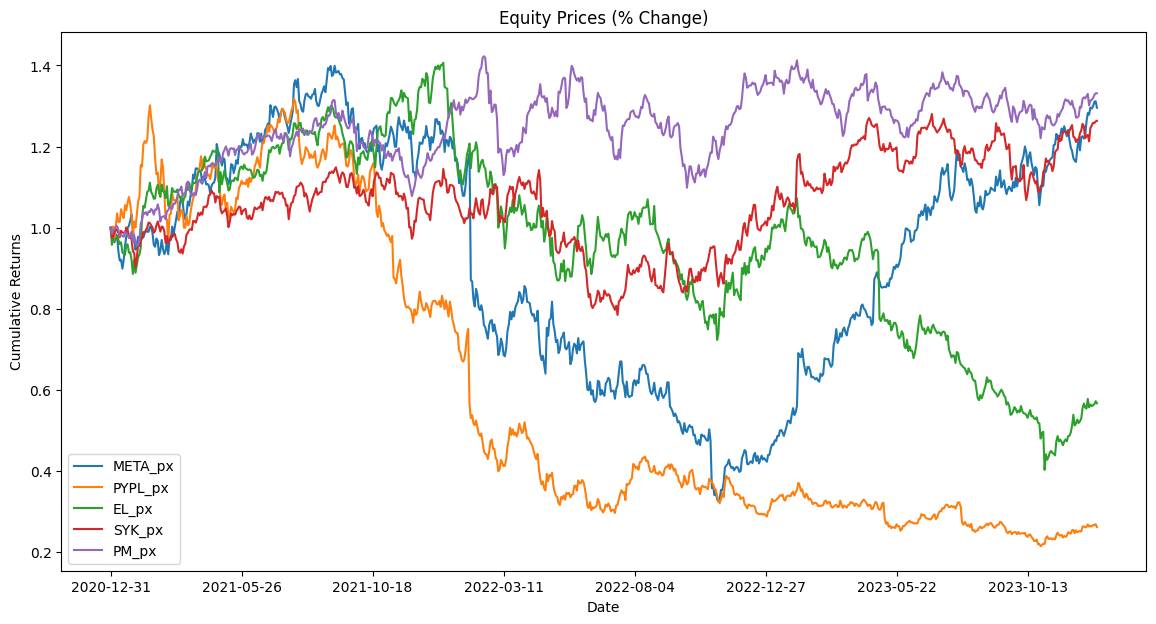

In [326]:

# Select the date range in the DataFrame
date_range_df = combined_df.loc[start_date:end_date]

# Calculate percent change based on the start date for all columns
percent_change_df = date_range_df.pct_change().fillna(0) + 1
cumulative_returns_df = percent_change_df.cumprod()

# Plot the cumulative returns as percent change from the start date
cumulative_returns_plot = cumulative_returns_df.plot(figsize=(14, 7))

cumulative_returns_plot.set_ylabel('Cumulative Returns')
cumulative_returns_plot.set_title('Equity Prices (% Change)')


#### Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

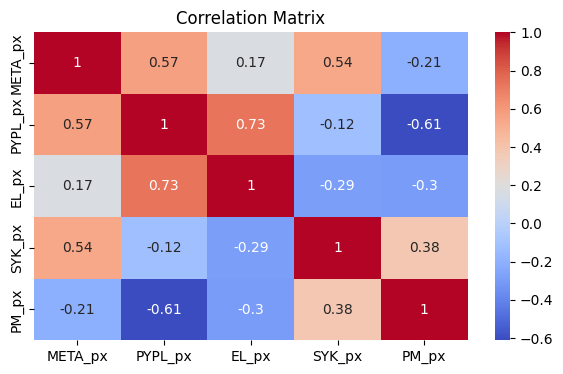

In [327]:
correlation_matrix = cumulative_returns_df.corr()
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
#plt.show()

#### Drawdown

<Figure size 1000x600 with 0 Axes>

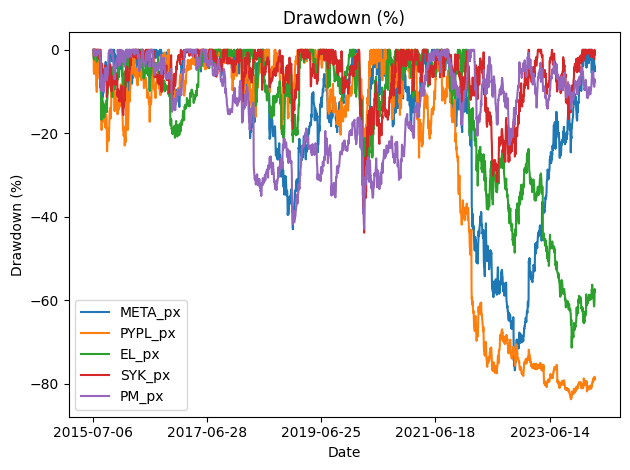

In [330]:
daily_returns = combined_df.pct_change()

cumulative_returns = (1 + daily_returns).cumprod()

cumulative_max = cumulative_returns.cummax()

drawdown = (cumulative_returns - cumulative_max) / cumulative_max

plt.figure(figsize=(10, 6))
(drawdown*100).plot()  # Convert drawdown to percentage
plt.title('Drawdown (%)')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.tight_layout()  # Adjust the padding between and around subplots.
plt.show()